In [1]:
#importacao de bibliotecas
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from datetime import date
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import time
import datetime
import os
import pandas as pd
import numpy as np
import re
import time
import benford as bf
from bs4 import BeautifulSoup
from tqdm import tqdm


In [2]:
#abrindo webdriver
driver = webdriver.Chrome()
#abrindo site do instagram
driver.get("http://www.instagram.com")
#selecionando inputs para insercao de dados, comando de espera
username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))

#login e senha do perfil de acesso
with open('instagram-tokens.txt', 'r') as tfile:
    yourusername = tfile.readline().strip('\n')
    yourpassword = tfile.readline().strip('\n')

#enviando dados para selenium
username.clear()
username.send_keys(yourusername)
password.clear()
password.send_keys(yourpassword)

#clicando no botão para enfim acessar perfil
button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()
time.sleep(5)
driver.get("http://www.instagram.com")
button = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[class='aOOlW   HoLwm ']"))).click()

#habemus login

TimeoutException: Message: 


In [4]:
#conta a ser inspecionada
influencer = input()
#entrada na conta do influencer, e verificação da quantidade de seguidores dele.
#driver = webdriver.Chrome()
driver.get('http://www.instagram.com/%s' %influencer)
sleep(2) 
page = "followers"
driver.find_element_by_xpath('//a[contains(@href, "%s")]' % page).click()
seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
sleep(2)
print('O total de seguidores dele é de %s' %total_seguidores)
sleep(3)   
    

thauana_niege
O total de seguidores dele é de 1051


In [5]:
#irá rolar a lista de seguidores até o fim, liberando todas as tags com os perfis
botao = int(total_seguidores/2)
for i in range(botao):
    driver.find_element_by_tag_name('html').send_keys(Keys.PAGE_DOWN*100) 

In [6]:
#com as tagas <a> liberadas após rolagem, código retira todos os nomes de perfil, e insere em uma lista
page = driver.page_source
soup = BeautifulSoup(page)
#soup.find_all('a')
lista_seguidores2 = [i.text for i in soup.find_all('a') if i.text != ""][16:]

In [7]:
numero_seguidores = []
#funcao passa em cada perfil da lista, e retira os dados de seus seguidores, adicionando a uma lista com os numeros.
#as duas entradas são a lista de seguidores retiradas anteriormente, e uma nova lista para receber os novos dados.
def dados_benford(lista_seguidores,numero_seguidores):
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from webdriver_manager.chrome import ChromeDriverManager
    import time
    import benford as bf
    from bs4 import BeautifulSoup
    from tqdm import tqdm

    #driver = webdriver.Chrome()
    page = "followers"
    pause = 1
    number_list = 0    
    for i in lista_seguidores:
        if (number_list/50 == pause):
            sleep(600)
            pause +=1
            try:
                driver.get(f'http://www.instagram.com/{i}')
                seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
                total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
                numero_seguidores.append(total_seguidores)
            except:
                numero_seguidores.append(0)
                
            print(f'{number_list} - Perfil:{i}, Seguidores:{total_seguidores}')
            number_list+=1
        else:
            try:
                driver.get(f'http://www.instagram.com/{i}')
                seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
                total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
                numero_seguidores.append(total_seguidores)
            except:
                numero_seguidores.append(0)
            print(f'{number_list} - Perfil:{i}, Seguidores:{total_seguidores}')
            number_list+=1
                

In [11]:
#perfil rodado - perfil 1
dados_benford(lista_seguidores,numero_seguidores)

0 - Perfil:josephlfsilva, Seguidores:1378
1 - Perfil:euemily.pxt, Seguidores:4022
2 - Perfil:tamiresrubia, Seguidores:2158
3 - Perfil:estersms2, Seguidores:1108
4 - Perfil:aaligajuridica, Seguidores:2310
5 - Perfil:uranusstore_, Seguidores:17
6 - Perfil:ferreira_manuelaa, Seguidores:41
7 - Perfil:happen.sunset, Seguidores:202
8 - Perfil:luizjapa_, Seguidores:1034
9 - Perfil:elaine.campos1006, Seguidores:2172
10 - Perfil:sheramos03, Seguidores:1141
11 - Perfil:cristianereginaono, Seguidores:113
12 - Perfil:vivicsi, Seguidores:1339
13 - Perfil:kethellencs, Seguidores:2329
14 - Perfil:julia.adefonso, Seguidores:1734
15 - Perfil:eubrunasiqueira, Seguidores:1928
16 - Perfil:passeiosdebaloes, Seguidores:743
17 - Perfil:carol_fviana, Seguidores:206
18 - Perfil:douglas.nunesofc, Seguidores:436
19 - Perfil:barbeariadojohny_, Seguidores:3307
20 - Perfil:clubedobalaoboituva, Seguidores:6251
21 - Perfil:eduardodealmeidaduraes, Seguidores:28
22 - Perfil:larissafernandes19, Seguidores:8757
23 - Perf

190 - Perfil:deb.dourado, Seguidores:690
191 - Perfil:freittasvan, Seguidores:356
192 - Perfil:sandraminharo, Seguidores:323
193 - Perfil:elaine.cmartins, Seguidores:294
194 - Perfil:lepatronofc, Seguidores:1137
195 - Perfil:belliny_13, Seguidores:29362
196 - Perfil:fessilverio, Seguidores:4322
197 - Perfil:pedrovascobr_, Seguidores:15365
198 - Perfil:dratatianekremer, Seguidores:3060
199 - Perfil:lariissaluz_, Seguidores:2861
200 - Perfil:romanellicostaseguros, Seguidores:434
201 - Perfil:brunasgarciiiaaa, Seguidores:988
202 - Perfil:palomacossero, Seguidores:901
203 - Perfil:natycarvalho39, Seguidores:2303
204 - Perfil:rooh_mahcedo, Seguidores:1107
205 - Perfil:phmanzoni, Seguidores:327
206 - Perfil:hederderito, Seguidores:957
207 - Perfil:maylicciardi, Seguidores:308
208 - Perfil:felipe.rizk, Seguidores:148
209 - Perfil:glaustore, Seguidores:1511
210 - Perfil:lilianjacintho, Seguidores:548
211 - Perfil:roseriolao, Seguidores:829
212 - Perfil:pamela_loraynne, Seguidores:1573
213 - Pe

378 - Perfil:tathy_luiza, Seguidores:422
379 - Perfil:gg_barber_shop, Seguidores:212
380 - Perfil:carlitabueno, Seguidores:515
381 - Perfil:leonor_lutz, Seguidores:1008
382 - Perfil:empreendoramabr, Seguidores:739
383 - Perfil:alecoiado, Seguidores:419
384 - Perfil:almaanycorretora, Seguidores:3931
385 - Perfil:elisiane.flores, Seguidores:1351
386 - Perfil:alveserikaa, Seguidores:1827
387 - Perfil:_thalitacristina, Seguidores:939
388 - Perfil:jovensmilionariosoficial, Seguidores:1235
389 - Perfil:fernabrlima, Seguidores:770
390 - Perfil:bruninhabunitinha, Seguidores:2298
391 - Perfil:jhowfacanha, Seguidores:5739
392 - Perfil:marcelooliveira914, Seguidores:106
393 - Perfil:alanascarin_, Seguidores:7
394 - Perfil:alanis_coimbra, Seguidores:256
395 - Perfil:kenyalimacorretoradeseguros, Seguidores:196
396 - Perfil:giuliapicarelli, Seguidores:2948
397 - Perfil:vanessavamvam, Seguidores:1483
398 - Perfil:jhullyzynha, Seguidores:1519
399 - Perfil:paulosergio_rossi, Seguidores:145
400 - Perfil

564 - Perfil:danigeenova, Seguidores:1206
565 - Perfil:josietemedeiros, Seguidores:137
566 - Perfil:heyolivera, Seguidores:557
567 - Perfil:corretorathais.schroll, Seguidores:652
568 - Perfil:ana_carvalhol, Seguidores:1519
569 - Perfil:behsillva, Seguidores:1237
570 - Perfil:valquiriakehdi, Seguidores:335
571 - Perfil:orthosodonto, Seguidores:1296
572 - Perfil:silabelezaeciaa, Seguidores:1008
573 - Perfil:b1riba, Seguidores:55
574 - Perfil:eds_bar27, Seguidores:92
575 - Perfil:vanessaburkuss, Seguidores:533
576 - Perfil:satuguita, Seguidores:46
577 - Perfil:clarissa_tauk, Seguidores:2163
578 - Perfil:ciadapizzacco, Seguidores:6016
579 - Perfil:ale.sanii, Seguidores:1617
580 - Perfil:aidarfagundesadvogados, Seguidores:251
581 - Perfil:brudhuf, Seguidores:1186
582 - Perfil:loiraalinerp_1910, Seguidores:950
583 - Perfil:b.eatrizsilva, Seguidores:1750
584 - Perfil:kauana_emylyn, Seguidores:794
585 - Perfil:jobs_universitarios, Seguidores:81
586 - Perfil:eudanco, Seguidores:56
587 - Perfil:

754 - Perfil:bruna6877, Seguidores:1317
755 - Perfil:cilla_schiestl, Seguidores:274
756 - Perfil:personalfighterph, Seguidores:1748
757 - Perfil:atortorellibru, Seguidores:1254
758 - Perfil:carolinaperrotta_, Seguidores:1785
759 - Perfil:viniciusmastropietro, Seguidores:1274
760 - Perfil:claricioliveira_, Seguidores:1485
761 - Perfil:brunosantana90, Seguidores:352
762 - Perfil:rock_girls_russia, Seguidores:14461
763 - Perfil:feelazarini, Seguidores:896
764 - Perfil:biaatebet, Seguidores:860
765 - Perfil:itswaal, Seguidores:482
766 - Perfil:mpereiraimoveis, Seguidores:115
767 - Perfil:_caio_rocha, Seguidores:278
768 - Perfil:baheckler, Seguidores:3978
769 - Perfil:marcuccicarla, Seguidores:367
770 - Perfil:thainangrecco, Seguidores:2297
771 - Perfil:_ateliedasgordices, Seguidores:416
772 - Perfil:carina_lacerda61, Seguidores:266
773 - Perfil:cidaah_moura, Seguidores:697
774 - Perfil:ana_pampolini, Seguidores:653
775 - Perfil:fabiolevi5277, Seguidores:114
776 - Perfil:fjrdemolay, Seguido

941 - Perfil:carlosdelfeu, Seguidores:106
942 - Perfil:naatsilverio, Seguidores:1480
943 - Perfil:capsjrp34, Seguidores:905
944 - Perfil:dgo.sanchez, Seguidores:2940
945 - Perfil:carolrspaz, Seguidores:833
946 - Perfil:correa01rodrigo, Seguidores:623
947 - Perfil:vi1nee._, Seguidores:84
948 - Perfil:dam9448, Seguidores:35
949 - Perfil:juninho_jcr, Seguidores:1411
950 - Perfil:fegodoy_l, Seguidores:4714
951 - Perfil:kah.2015, Seguidores:277
952 - Perfil:analaurentis, Seguidores:280
953 - Perfil:sayyesfilmes, Seguidores:66
954 - Perfil:alanis.coimbra, Seguidores:1864
955 - Perfil:fernando1914_, Seguidores:327
956 - Perfil:thais_s_melo, Seguidores:680
957 - Perfil:carlalorena33, Seguidores:249
958 - Perfil:beatrizc_araujo, Seguidores:863
959 - Perfil:cristina_pperes, Seguidores:137
960 - Perfil:alessandra_lika, Seguidores:44
961 - Perfil:tovidesing, Seguidores:203
962 - Perfil:evelyn_cavalcante_, Seguidores:928
963 - Perfil:kleberaugustodecastro, Seguidores:187
964 - Perfil:blum_1999, Seg

1129 - Perfil:raio.desol, Seguidores:37
1130 - Perfil:pupobarbershop, Seguidores:238
1131 - Perfil:jessica_morais25, Seguidores:387
1132 - Perfil:fabinho.levi5277, Seguidores:215
1133 - Perfil:celio_gianini, Seguidores:290
1134 - Perfil:subliimage, Seguidores:78
1135 - Perfil:feliipeecostaa, Seguidores:110
1136 - Perfil:bruno_nunes1998, Seguidores:632
1137 - Perfil:aka.vitao, Seguidores:227
1138 - Perfil:flavinhafernandes15, Seguidores:468
1139 - Perfil:julie_rcp, Seguidores:2060
1140 - Perfil:nogueirafdb, Seguidores:283
1141 - Perfil:camila_ap.araujo, Seguidores:873
1142 - Perfil:lilliann____, Seguidores:2217
1143 - Perfil:leomoldero, Seguidores:241
1144 - Perfil:raaaahc, Seguidores:2610
1145 - Perfil:camila_kauan, Seguidores:457
1146 - Perfil:arlindochapetta, Seguidores:2829
1147 - Perfil:adegavv, Seguidores:793
1148 - Perfil:viajeipostei, Seguidores:4014
1149 - Perfil:saaferrarii, Seguidores:2198
1150 - Perfil:muba297, Seguidores:422
1151 - Perfil:paulorossi56, Seguidores:206
1152 -

In [14]:
#salvando dados em um dataframe
df = pd.DataFrame([lista_seguidores,numero_seguidores]).T
df.columns = ['perfil_seguidores1','numero_seguidores1']

In [16]:
#salvando em arquivo csv
df.to_csv('perfil1.csv', index=False)

In [3]:
#abrir arquivo salvo
df = pd.read_csv('perfil1.csv')

In [4]:
df.head()

,perfil_seguidores1,numero_seguidores1
0,josephlfsilva,1378
1,euemily.pxt,4022
2,tamiresrubia,2158
3,estersms2,1108
4,aaligajuridica,2310


In [12]:
len(numero_seguidores)

1274

In [ ]:
len(lista_seguidores)


Initialized sequence with 1264 registries.

Test performed on 1264 registries.
Discarded 0 records < 1 after preparation.


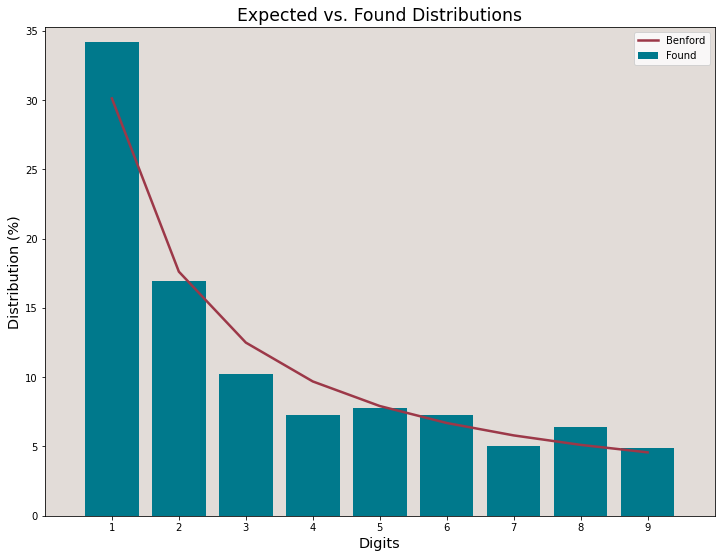

In [16]:
sp1 = pd.read_csv('perfil1.csv')
f1d = bf.first_digits(sp1.numero_seguidores1, digs=1, decimals=2)

In [27]:
benf1 = bf.Benford((sp1, 'numero_seguidores1'), decimals=8)


 ########## Benford Object Instantiated ########### 

Initial sample size: 1274.

Test performed on 1264 registries.

Number of discarded entries for each test:
{'F1D': 1253, 'F2D': 1253, 'F3D': 1253, 'SD': 1253, 'L2D': 1253}


In [32]:
benf1.sec_order()


Second order tests run in 1001 registries.

Number of discarded entries for second order tests:
{'F1D_sec': 102, 'F2D_sec': 102, 'F3D_sec': 102, 'SD_sec': 102, 'L2D_sec': 102}


In [ ]:
#perfil rodado com bots
dados_benford(lista_seguidores,numero_seguidores)

In [6]:
#conta a ser inspecionada
influencer1 = input()
lista_seguidores1 = []

def busca_seguidores(influencer, lista_seguidores):
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from webdriver_manager.chrome import ChromeDriverManager
    import time
    import benford as bf
    from bs4 import BeautifulSoup
    #entrada na conta do influencer, e verificação da quantidade de seguidores dele.
    #abrindo webdriver
    driver = webdriver.Chrome()
    #abrindo site do instagram
    driver.get("http://www.instagram.com")
    #selecionando inputs para insercao de dados, comando de espera
    username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
    password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))

    #login e senha do perfil de acesso
    with open('instagram-tokens.txt', 'r') as tfile:
        yourusername = tfile.readline().strip('\n')
        yourpassword = tfile.readline().strip('\n')

    #enviando dados para selenium
    username.clear()
    username.send_keys(yourusername)
    password.clear()
    password.send_keys(yourpassword)

    #clicando no botão para enfim acessar perfil
    button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()
    time.sleep(5)
    driver.get("http://www.instagram.com")
    button = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[class='aOOlW   HoLwm ']"))).click()

    #habemus login
    driver.get('http://www.instagram.com/%s' %influencer)
    sleep(2) 
    page = "followers"
    driver.find_element_by_xpath('//a[contains(@href, "%s")]' % page).click()
    seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
    total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
    sleep(2)
    print('O total de seguidores dele é de %s' %total_seguidores)
    sleep(3)   
    #irá rolar a lista de seguidores até o fim, liberando todas as tags com os perfis
    botao = int(total_seguidores/2)
    for i in range(botao):
        driver.find_element_by_tag_name('html').send_keys(Keys.PAGE_DOWN*100)
    #com as tagas <a> liberadas após rolagem, código retira todos os nomes de perfil, e insere em uma lista
    page = driver.page_source
    soup = BeautifulSoup(page)
    #soup.find_all('a')
    lista_seguidores1 = [i.text for i in soup.find_all('a') if i.text != ""][16:]

cesarrs


In [12]:
len(lista_seguidores1)

2410

In [13]:
numero_seguidores1 = []

In [16]:
#perfil rodado perfil 2
dados_benford(lista_seguidores1,numero_seguidores1)

0 - Perfil:vini_h20, Seguidores:45
1 - Perfil:cleitin791, Seguidores:48
2 - Perfil:adalberto_solidade_, Seguidores:38
3 - Perfil:lauraa.pachecoo, Seguidores:305
4 - Perfil:frasesparacasais2, Seguidores:67
5 - Perfil:lopees_kah, Seguidores:128
6 - Perfil:lorexavier7, Seguidores:45
7 - Perfil:quintana.cat, Seguidores:208
8 - Perfil:carlosricardoo56, Seguidores:60
9 - Perfil:vmbconta4, Seguidores:42
10 - Perfil:limasaudesbr, Seguidores:63
11 - Perfil:filipecosta5485, Seguidores:131
12 - Perfil:habibmanasses, Seguidores:38
13 - Perfil:ousados_sonhadores10, Seguidores:70
14 - Perfil:fabianiha2020, Seguidores:61
15 - Perfil:cristianoog11, Seguidores:60
16 - Perfil:simone_lekigs, Seguidores:47
17 - Perfil:ofc_da_stefany_bays_, Seguidores:119
18 - Perfil:marianahgarcia6, Seguidores:134
19 - Perfil:ris_aely3, Seguidores:33
20 - Perfil:gamergota5, Seguidores:36
21 - Perfil:shelbycompanymoddedcars, Seguidores:58
22 - Perfil:luna202188, Seguidores:102
23 - Perfil:omarzinhuuu, Seguidores:32
24 - Pe

196 - Perfil:douglaspirezer, Seguidores:34
197 - Perfil:beijamim923, Seguidores:53
198 - Perfil:deixaconfidencial_ws, Seguidores:248
199 - Perfil:fandejudheadjones, Seguidores:129
200 - Perfil:diogo17mongacity, Seguidores:65
201 - Perfil:carlahsteven_, Seguidores:80
202 - Perfil:deusconosco210, Seguidores:52
203 - Perfil:yuyiygor, Seguidores:69
204 - Perfil:empreender5.0, Seguidores:45
205 - Perfil:laura_freitas2001, Seguidores:122
206 - Perfil:samylambertin, Seguidores:83
207 - Perfil:gessyca233, Seguidores:47
208 - Perfil:alanzuareth4, Seguidores:41
209 - Perfil:beroll155524, Seguidores:40
210 - Perfil:dud_amaria2, Seguidores:124
211 - Perfil:jandel.sz15, Seguidores:95
212 - Perfil:ferrug2021, Seguidores:58
213 - Perfil:styluz_luzia, Seguidores:102
214 - Perfil:lenamikless, Seguidores:41
215 - Perfil:viicente.97, Seguidores:1104
216 - Perfil:pamelacris85, Seguidores:90
217 - Perfil:luciopionozo, Seguidores:33
218 - Perfil:musicavida5, Seguidores:67
219 - Perfil:afbnyeta, Seguidores:2

392 - Perfil:faclubeda.flay, Seguidores:67
393 - Perfil:faclubedamila1, Seguidores:69
394 - Perfil:eduacav5, Seguidores:103
395 - Perfil:frasesdelivross1, Seguidores:33
396 - Perfil:camila.modaemcalcados, Seguidores:153
397 - Perfil:luciana.rizzi.39, Seguidores:714
398 - Perfil:mensageirodobem9, Seguidores:90
399 - Perfil:prisantosalmeida, Seguidores:86
400 - Perfil:raquelguedes68, Seguidores:74
401 - Perfil:jz229518juh, Seguidores:190
402 - Perfil:janeparli, Seguidores:107
403 - Perfil:wrathcharge, Seguidores:44
404 - Perfil:portudigital, Seguidores:162
405 - Perfil:beatzsoza, Seguidores:188
406 - Perfil:valeria_liima28, Seguidores:346
407 - Perfil:danielnunes25, Seguidores:173
408 - Perfil:heitordrez, Seguidores:72
409 - Perfil:theoriginals_10, Seguidores:42
410 - Perfil:frases_criativas44, Seguidores:80
411 - Perfil:felippe.juniorr, Seguidores:37
412 - Perfil:frases_fantasticas8, Seguidores:615
413 - Perfil:malum.artines, Seguidores:138
414 - Perfil:amanda55224, Seguidores:116
415 -

587 - Perfil:renatarenatinhaalves1515, Seguidores:190
588 - Perfil:larissa_catharina__, Seguidores:118
589 - Perfil:thiago04638, Seguidores:54
590 - Perfil:lirduyipsa, Seguidores:42
591 - Perfil:carla.sousa9877, Seguidores:57
592 - Perfil:iamrenatita1, Seguidores:45
593 - Perfil:bleendasz, Seguidores:152
594 - Perfil:eliz_a2698, Seguidores:63
595 - Perfil:_taianamorais, Seguidores:84
596 - Perfil:pamella.putz, Seguidores:111
597 - Perfil:hemilyc_araujoo, Seguidores:48
598 - Perfil:frases_pra_voce12, Seguidores:71
599 - Perfil:academiafitt20, Seguidores:71
600 - Perfil:elbe.1, Seguidores:63
601 - Perfil:le.ti9435, Seguidores:47
602 - Perfil:ster3015, Seguidores:221
603 - Perfil:otaviobradorios, Seguidores:30
604 - Perfil:emillysantos8190, Seguidores:56
605 - Perfil:silgu89, Seguidores:105
606 - Perfil:kelenlopiees, Seguidores:322
607 - Perfil:tiozedobbb, Seguidores:66
608 - Perfil:subaru_natsuki18, Seguidores:59
609 - Perfil:udimetropole, Seguidores:60
610 - Perfil:jaciraorlanda, Seguid

783 - Perfil:ulima.s, Seguidores:24
784 - Perfil:val_demarfrancisco, Seguidores:24
785 - Perfil:jeanesposito60, Seguidores:24
786 - Perfil:pedrogomez453gvf, Seguidores:24
787 - Perfil:zilean74, Seguidores:24
788 - Perfil:helenoliveira93, Seguidores:24
789 - Perfil:shaolin_matador_de_porco17, Seguidores:24
790 - Perfil:sophiasarah42, Seguidores:24
791 - Perfil:oliveiradaiane36, Seguidores:24
792 - Perfil:souza.brendinha, Seguidores:24
793 - Perfil:roupasdafillo, Seguidores:24
794 - Perfil:ganhando.dinheiro.onlinne, Seguidores:24
795 - Perfil:frutas_saudeboa, Seguidores:24
796 - Perfil:iagovinicius374, Seguidores:24
797 - Perfil:herbet152, Seguidores:24
798 - Perfil:pedromateus489, Seguidores:24
799 - Perfil:nayarapinheiro745, Seguidores:24
800 - Perfil:manu.eladossantos, Seguidores:24
801 - Perfil:anarodriguexx, Seguidores:24
802 - Perfil:_anamed2, Seguidores:24
803 - Perfil:mirellaalvs09, Seguidores:24
804 - Perfil:_milenabaptista, Seguidores:24
805 - Perfil:silvanete2426, Seguidores:2

976 - Perfil:brbarbarat, Seguidores:24
977 - Perfil:piaui_brasil2050, Seguidores:24
978 - Perfil:soul.ivro, Seguidores:24
979 - Perfil:hugosilva821, Seguidores:24
980 - Perfil:mercia_souza8, Seguidores:24
981 - Perfil:lhsluiza21, Seguidores:24
982 - Perfil:zionaap, Seguidores:24
983 - Perfil:dnsj.4, Seguidores:24
984 - Perfil:variacoes2020, Seguidores:24
985 - Perfil:mnfernanda, Seguidores:24
986 - Perfil:priscilasouza77, Seguidores:24
987 - Perfil:bele9799, Seguidores:24
988 - Perfil:aprenda_maquiagem2.0, Seguidores:24
989 - Perfil:gi.silva.cris, Seguidores:24
990 - Perfil:makeyourself.br, Seguidores:24
991 - Perfil:carolina.cowgirl, Seguidores:24
992 - Perfil:mundodosdogbeagles, Seguidores:24
993 - Perfil:airencorreia2017, Seguidores:24
994 - Perfil:viciadanaapple, Seguidores:24
995 - Perfil:sabrinaborgesmaria, Seguidores:24
996 - Perfil:melissariccig, Seguidores:24
997 - Perfil:otaviogabriel30, Seguidores:24
998 - Perfil:majorie.rivieira, Seguidores:24
999 - Perfil:antaresconf2019, 

1169 - Perfil:moniczrodrigues, Seguidores:24
1170 - Perfil:estelinhacampos20, Seguidores:24
1171 - Perfil:fabriciorodriguesramalho, Seguidores:24
1172 - Perfil:samanda2325, Seguidores:24
1173 - Perfil:aninha_larissa73, Seguidores:24
1174 - Perfil:cremy.esdras, Seguidores:24
1175 - Perfil:aurorarosangela4, Seguidores:24
1176 - Perfil:santos.bm20, Seguidores:24
1177 - Perfil:viva2021motivado, Seguidores:24
1178 - Perfil:amandagomes5666, Seguidores:24
1179 - Perfil:leticia.brito__, Seguidores:24
1180 - Perfil:joice2512, Seguidores:24
1181 - Perfil:carolinepagliabelle, Seguidores:24
1182 - Perfil:eiikarla_, Seguidores:24
1183 - Perfil:faclubedo.luan, Seguidores:24
1184 - Perfil:reegg_iiss, Seguidores:24
1185 - Perfil:andriusampaio, Seguidores:24
1186 - Perfil:c.silvamarilia, Seguidores:24
1187 - Perfil:cantadanalata, Seguidores:24
1188 - Perfil:daysee97, Seguidores:24
1189 - Perfil:tvweb27, Seguidores:24
1190 - Perfil:lisboalina98, Seguidores:24
1191 - Perfil:aracellymaria8, Seguidores:24


1360 - Perfil:_zeus.capa, Seguidores:24
1361 - Perfil:maralina22, Seguidores:24
1362 - Perfil:marianabernadi09, Seguidores:24
1363 - Perfil:zueirainfinita4, Seguidores:24
1364 - Perfil:rodriguesermelindo905, Seguidores:24
1365 - Perfil:natalice_busto, Seguidores:24
1366 - Perfil:naty_larah0854, Seguidores:24
1367 - Perfil:mariafrancisca4855, Seguidores:24
1368 - Perfil:vivv.iii, Seguidores:24
1369 - Perfil:samanthabernades21, Seguidores:24
1370 - Perfil:marivissole, Seguidores:24
1371 - Perfil:adriana_ferreira789, Seguidores:24
1372 - Perfil:severino.dog, Seguidores:24
1373 - Perfil:gabizinha1026, Seguidores:24
1374 - Perfil:luiz.40000, Seguidores:24
1375 - Perfil:barren_martins, Seguidores:24
1376 - Perfil:demi.fas24, Seguidores:24
1377 - Perfil:vida.fitnessxs, Seguidores:24
1378 - Perfil:insp.iracaolooks2020, Seguidores:24
1379 - Perfil:peedrao_lins, Seguidores:24
1380 - Perfil:tejanopaula509, Seguidores:24
1381 - Perfil:_saramb08, Seguidores:24
1382 - Perfil:tielytavares, Seguidores

1550 - Perfil:marcospaulocarvalh_, Seguidores:24
1551 - Perfil:brendogudman_eri, Seguidores:24
1552 - Perfil:mariaclaudia165, Seguidores:24
1553 - Perfil:tafarel_aldo, Seguidores:24
1554 - Perfil:ferrobertah, Seguidores:24
1555 - Perfil:xand_js, Seguidores:24
1556 - Perfil:goiabas_nm2, Seguidores:24
1557 - Perfil:dinho.147, Seguidores:24
1558 - Perfil:liane27145, Seguidores:24
1559 - Perfil:inspira._makes, Seguidores:24
1560 - Perfil:alice32785, Seguidores:24
1561 - Perfil:alex.sandro_25, Seguidores:24
1562 - Perfil:vivi_silva_crr, Seguidores:24
1563 - Perfil:ulanaprt, Seguidores:24
1564 - Perfil:clubemss, Seguidores:24
1565 - Perfil:cristianoliver941, Seguidores:24
1566 - Perfil:faclubedobabal, Seguidores:24
1567 - Perfil:jrs5417, Seguidores:24
1568 - Perfil:vandameroberto, Seguidores:24
1569 - Perfil:kamilakamila0001, Seguidores:24
1570 - Perfil:francocastro411, Seguidores:24
1571 - Perfil:banshee1657, Seguidores:24
1572 - Perfil:sadddstory666, Seguidores:24
1573 - Perfil:juniorsique

1743 - Perfil:personalize.angelo, Seguidores:24
1744 - Perfil:aishalym0, Seguidores:24
1745 - Perfil:heelenadaluz, Seguidores:24
1746 - Perfil:gabriela_17623, Seguidores:24
1747 - Perfil:laah_rio, Seguidores:24
1748 - Perfil:brendaemprota, Seguidores:24
1749 - Perfil:raphattorres, Seguidores:24
1750 - Perfil:flaviabroodep, Seguidores:24
1751 - Perfil:_salgados20, Seguidores:24
1752 - Perfil:luci.bezrr, Seguidores:24
1753 - Perfil:ganharseguidores1.000, Seguidores:24
1754 - Perfil:angelamaria1660, Seguidores:24
1755 - Perfil:bellin_xx, Seguidores:24
1756 - Perfil:analuyzac.fcbr, Seguidores:24
1757 - Perfil:maria_silva_liza, Seguidores:24
1758 - Perfil:annacarolinna_____, Seguidores:24
1759 - Perfil:victoriaperes45, Seguidores:24
1760 - Perfil:sagitariannana, Seguidores:24
1761 - Perfil:kleber.lopessy, Seguidores:24
1762 - Perfil:adrianabrazsg, Seguidores:24
1763 - Perfil:caleb.trages, Seguidores:24
1764 - Perfil:rodriguesderek62, Seguidores:24
1765 - Perfil:maysegreto, Seguidores:24
176

1937 - Perfil:julysophiaa_, Seguidores:24
1938 - Perfil:duuduuhp1, Seguidores:24
1939 - Perfil:_juann06, Seguidores:24
1940 - Perfil:leonardofranco474, Seguidores:24
1941 - Perfil:lean.dro9935, Seguidores:24
1942 - Perfil:moniquesanchezxx, Seguidores:24
1943 - Perfil:akira_ange, Seguidores:24
1944 - Perfil:fla.mengolove1, Seguidores:24
1945 - Perfil:guilh.erme675, Seguidores:24
1946 - Perfil:caylane8617, Seguidores:24
1947 - Perfil:sophieleonorgarcia, Seguidores:24
1948 - Perfil:moraes_anirak, Seguidores:24
1949 - Perfil:tamy0__, Seguidores:24
1950 - Perfil:eu_tiagosouza, Seguidores:24
1951 - Perfil:makes_baphos, Seguidores:24
1952 - Perfil:marcella_gomes09, Seguidores:24
1953 - Perfil:gisematos2, Seguidores:24
1954 - Perfil:best.carbr, Seguidores:24
1955 - Perfil:324thomasshelby, Seguidores:24
1956 - Perfil:juliana620ca, Seguidores:24
1957 - Perfil:nanda_corronel, Seguidores:24
1958 - Perfil:brasilnegocios775, Seguidores:24
1959 - Perfil:brunarocha695, Seguidores:24
1960 - Perfil:krau

2127 - Perfil:tecnopontatreinamentos, Seguidores:24
2128 - Perfil:eletricabasica.oficial, Seguidores:24
2129 - Perfil:wtf.scrum.master, Seguidores:24
2130 - Perfil:desenvolvendofuturos, Seguidores:24
2131 - Perfil:profcodinhoto, Seguidores:24
2132 - Perfil:devlandia, Seguidores:24
2133 - Perfil:eu.datascience, Seguidores:24
2134 - Perfil:elisamamary_, Seguidores:24
2135 - Perfil:jheny_nunes02, Seguidores:24
2136 - Perfil:thata_souza, Seguidores:24
2137 - Perfil:meninah.dev, Seguidores:24
2138 - Perfil:babioliveira_c, Seguidores:24
2139 - Perfil:je_palacio, Seguidores:24
2140 - Perfil:thayrinne_c03, Seguidores:24
2141 - Perfil:jhenny.cris10, Seguidores:24
2142 - Perfil:herbertmelosp, Seguidores:24
2143 - Perfil:king_capsp, Seguidores:24
2144 - Perfil:fdm_conceito, Seguidores:24
2145 - Perfil:marcus_vinicius_bossi, Seguidores:24
2146 - Perfil:robertabeatrizsantos, Seguidores:24
2147 - Perfil:projetodofacaobem, Seguidores:24
2148 - Perfil:desenvolvedormaster, Seguidores:24
2149 - Perfil:t

2313 - Perfil:eniopinho, Seguidores:24
2314 - Perfil:theluxdrinks, Seguidores:24
2315 - Perfil:karolg.arcia, Seguidores:24
2316 - Perfil:franklinneris, Seguidores:24
2317 - Perfil:danillollins, Seguidores:24
2318 - Perfil:pizza_hot2020, Seguidores:24
2319 - Perfil:es_forte_es_grande, Seguidores:24
2320 - Perfil:loja_monstyle, Seguidores:24
2321 - Perfil:k2.consulting, Seguidores:24
2322 - Perfil:pamela.maciel.167, Seguidores:24
2323 - Perfil:biiahairb, Seguidores:24
2324 - Perfil:_theenglishstudent, Seguidores:24
2325 - Perfil:washingtonlimacordeiro, Seguidores:24
2326 - Perfil:projetoeuvoceeosamba, Seguidores:24
2327 - Perfil:__karool, Seguidores:24
2328 - Perfil:olavo830, Seguidores:24
2329 - Perfil:rhuanls, Seguidores:24
2330 - Perfil:eduardoaparecido.ferreira, Seguidores:24
2331 - Perfil:viniciuscolecao, Seguidores:24
2332 - Perfil:deuza1969, Seguidores:24
2333 - Perfil:italorodrigues.7, Seguidores:24
2334 - Perfil:lana.donati, Seguidores:24
2335 - Perfil:samiraign, Seguidores:24
2

In [17]:
df1 = pd.DataFrame([lista_seguidores1,numero_seguidores1]).T
df1.columns = ['perfil_seguidores2','numero_seguidores2']

In [19]:
#salvando em arquivo csv
df1.to_csv('perfil2.csv', index=False)

In [18]:
df1.head()

,perfil_seguidores2,numero_seguidores2
0,vini_h20,45
1,cleitin791,48
2,adalberto_solidade_,38
3,lauraa.pachecoo,305
4,frasesparacasais2,67



Initialized sequence with 2368 registries.

Test performed on 2368 registries.
Discarded 0 records < 1 after preparation.


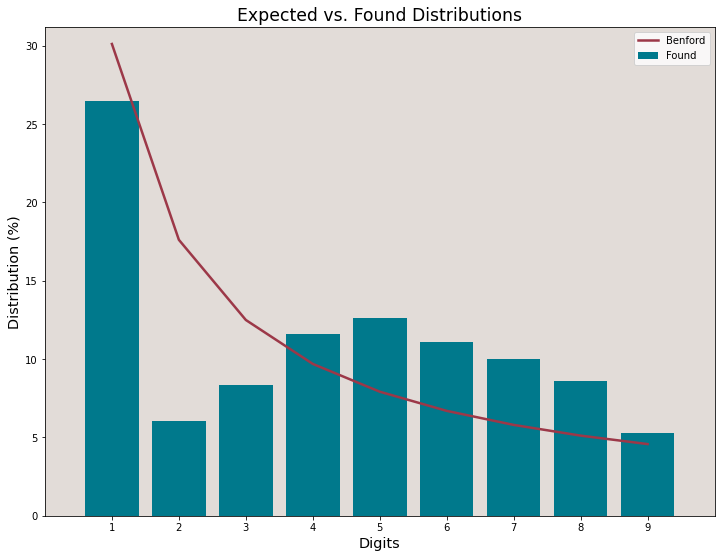

In [5]:
sp = pd.read_csv('perfil2.csv')
f1d = bf.first_digits(sp.numero_seguidores2, digs=1, decimals=2)

In [24]:

benf = bf.Benford((sp, 'numero_seguidores2'), decimals=8)


 ########## Benford Object Instantiated ########### 

Initial sample size: 2410.

Test performed on 2368 registries.

Number of discarded entries for each test:
{'F1D': 2343, 'F2D': 2343, 'F3D': 2343, 'SD': 2343, 'L2D': 2343}



 ##############  Second Digit Test  ############### 

Mean Absolute Deviation: 0.095065
MAD > 0.012000: Nonconformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.400321 
	Critical value: 0.272000 -- FAIL

	Chi square: 43.883360 
	Critical value: 16.919000 -- FAIL

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

         Expected  Found   Z_score
Sec_Dig                           
0        0.119679   0.52  5.858549


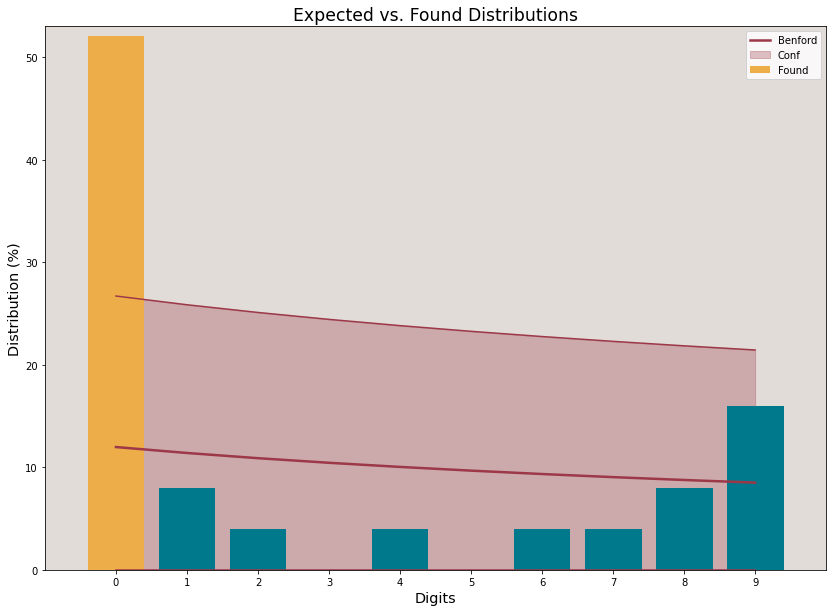

In [26]:

benf.SD.report()

In [8]:
#rodando pergil 3
numero_seguidores2 = []

dados_benford(lista_seguidores2,numero_seguidores2)

0 - Perfil:no_conceito, Seguidores:2809
1 - Perfil:djapasushi.vip, Seguidores:216
2 - Perfil:camilaganzolli321, Seguidores:216
3 - Perfil:amanda.faoli, Seguidores:2880
4 - Perfil:greguinhanat, Seguidores:16844
5 - Perfil:thais.msa, Seguidores:664
6 - Perfil:facedoctor_vilaolimpia, Seguidores:1858
7 - Perfil:mihziita, Seguidores:1858
8 - Perfil:eanchustegui, Seguidores:1858
9 - Perfil:gi.marcelohyladobrasil, Seguidores:924
10 - Perfil:viseirasup, Seguidores:15248
11 - Perfil:franhannmakeup, Seguidores:1690
12 - Perfil:marinabelardi_semijoias, Seguidores:1795
13 - Perfil:l3onardo_luan, Seguidores:315
14 - Perfil:mg305solutions, Seguidores:63
15 - Perfil:gordinhosincero__, Seguidores:63
16 - Perfil:wish_for_quiche, Seguidores:300
17 - Perfil:lojinha_da_nathii, Seguidores:2474
18 - Perfil:charolamanuzzi_, Seguidores:15099
19 - Perfil:greg_orypeters, Seguidores:15099
20 - Perfil:izadoratardim, Seguidores:4230
21 - Perfil:charlesch810, Seguidores:4230
22 - Perfil:dudinha_saoleo, Seguidores:4

186 - Perfil:anacarolina.land, Seguidores:8321
187 - Perfil:aalmeida01, Seguidores:8321
188 - Perfil:jevctba, Seguidores:1026
189 - Perfil:aletania, Seguidores:272637
190 - Perfil:drfabiohsaccardo, Seguidores:272637
191 - Perfil:pingodeamor.costura, Seguidores:1135
192 - Perfil:ditavalenti, Seguidores:1773
193 - Perfil:nab_store, Seguidores:2440
194 - Perfil:lojafordress, Seguidores:5336
195 - Perfil:andreclbarbosa, Seguidores:445
196 - Perfil:natytouma, Seguidores:1217
197 - Perfil:giuliafarha, Seguidores:1217
198 - Perfil:pecury10, Seguidores:1217
199 - Perfil:fabinhocosta, Seguidores:1217
200 - Perfil:venasclinicavascular, Seguidores:2776
201 - Perfil:jetgarage_guaruja, Seguidores:2781
202 - Perfil:mariachurrosgourmet, Seguidores:1977
203 - Perfil:esteticasimonetrofino, Seguidores:981
204 - Perfil:studiomaristela, Seguidores:1807
205 - Perfil:carlos_simoes_imoveis, Seguidores:1333
206 - Perfil:_drogariafutura, Seguidores:4925
207 - Perfil:grazielladosimoveis, Seguidores:34739
208 - 

371 - Perfil:monidudalemesvianna, Seguidores:372
372 - Perfil:ilustraamoor, Seguidores:1185
373 - Perfil:mabel.w.e, Seguidores:1215
374 - Perfil:novodesignermoveisplanejados, Seguidores:625
375 - Perfil:dezinhomello, Seguidores:625
376 - Perfil:lauriane.mendes.311, Seguidores:625
377 - Perfil:evolethevo, Seguidores:2320
378 - Perfil:priscila_21vargas, Seguidores:2320
379 - Perfil:minhavoehumapeca, Seguidores:95
380 - Perfil:groovearparty, Seguidores:972
381 - Perfil:island__life20, Seguidores:173
382 - Perfil:saltoduplorio, Seguidores:173
383 - Perfil:rodriguesdanilo9, Seguidores:173
384 - Perfil:pedropaulomachadoo, Seguidores:403
385 - Perfil:antonio_titajp, Seguidores:403
386 - Perfil:clairemartinelli, Seguidores:403
387 - Perfil:ana_ddelgado, Seguidores:932
388 - Perfil:rodrigoreisscoach, Seguidores:150
389 - Perfil:trocouyt, Seguidores:150
390 - Perfil:pedraovascaoo, Seguidores:220
391 - Perfil:rogeria_trips21, Seguidores:718
392 - Perfil:arezzo_joaocachoeira, Seguidores:4282
393 -

559 - Perfil:diogokoficial, Seguidores:1307
560 - Perfil:eliane_penteado, Seguidores:1553
561 - Perfil:fabiorzb, Seguidores:374
562 - Perfil:marcia.rb, Seguidores:374
563 - Perfil:tati_pl_05, Seguidores:374
564 - Perfil:mario.pavao, Seguidores:977
565 - Perfil:raphajudo, Seguidores:977
566 - Perfil:renan_souza_rsd686, Seguidores:292
567 - Perfil:mario_sterzo, Seguidores:2854
568 - Perfil:carolina_duarrte, Seguidores:1130
569 - Perfil:fabimenicucci, Seguidores:1130
570 - Perfil:garden_of_eden_goe, Seguidores:1171
571 - Perfil:cleberhigino, Seguidores:1171
572 - Perfil:leocfaria, Seguidores:1171
573 - Perfil:fabiolioneselodo, Seguidores:1171
574 - Perfil:andre_bretas, Seguidores:887
575 - Perfil:marceloadeassis, Seguidores:1276
576 - Perfil:edubragante23, Seguidores:1607
577 - Perfil:obama_bulldog, Seguidores:78
578 - Perfil:voucherclub, Seguidores:1325
579 - Perfil:sabor_doce_, Seguidores:1325
580 - Perfil:olhardefilipe, Seguidores:441
581 - Perfil:omelhordesp_, Seguidores:441
582 - Per

748 - Perfil:beilsondosreiscarmo, Seguidores:20
749 - Perfil:gpimenta00, Seguidores:20
750 - Perfil:nego_moiza, Seguidores:900
751 - Perfil:fabiozappa_, Seguidores:12402
752 - Perfil:tosemideiadoquecolocar, Seguidores:12402
753 - Perfil:pati_terres, Seguidores:12402
754 - Perfil:daniferri.brandao, Seguidores:682
755 - Perfil:rinaldi_lari, Seguidores:1351
756 - Perfil:kimccamelo, Seguidores:1351
757 - Perfil:cristianabocardi, Seguidores:1351
758 - Perfil:notcbeachwear.praiadorosa, Seguidores:11324
759 - Perfil:edineiaetiene, Seguidores:91
760 - Perfil:sergio_fernando1, Seguidores:91
761 - Perfil:gabymedina359, Seguidores:91
762 - Perfil:lucastaisses, Seguidores:91
763 - Perfil:viviiestevao, Seguidores:91
764 - Perfil:mobrigadeiro, Seguidores:5733
765 - Perfil:amanda.alvesvd, Seguidores:29374
766 - Perfil:henrika1, Seguidores:29374
767 - Perfil:andrigomattos, Seguidores:29374
768 - Perfil:doctorcellmobile, Seguidores:1116
769 - Perfil:vitorfalves, Seguidores:1116
770 - Perfil:katitagondo

938 - Perfil:kakarenner, Seguidores:862
939 - Perfil:cassiomagoo, Seguidores:862
940 - Perfil:daniferribrandao, Seguidores:862
941 - Perfil:beneditah, Seguidores:862
942 - Perfil:geronimotonelli, Seguidores:862
943 - Perfil:atiprudente_vegan, Seguidores:939
944 - Perfil:dailima2, Seguidores:245
945 - Perfil:isoldibett_, Seguidores:245
946 - Perfil:deniseabreu20, Seguidores:416
947 - Perfil:ca_kovac, Seguidores:416
948 - Perfil:biazusarquitetura, Seguidores:31337
949 - Perfil:hericmoraess, Seguidores:31337
950 - Perfil:josioliveira0106, Seguidores:31337
951 - Perfil:calvinsilasgarcia, Seguidores:31337
952 - Perfil:ibexxconcept, Seguidores:923
953 - Perfil:petitfeet_baby, Seguidores:2258
954 - Perfil:jejeteixeira, Seguidores:3055
955 - Perfil:housenrocks, Seguidores:198
956 - Perfil:bestchoiceimport, Seguidores:1370
957 - Perfil:vovolacospet, Seguidores:2006
958 - Perfil:alemaodutrasul, Seguidores:2006
959 - Perfil:nibortolatto, Seguidores:2215
960 - Perfil:rzacessorios, Seguidores:2107


In [17]:
backup2_ns = numero_seguidores2
backup2_ls = lista_seguidores2

In [14]:
teste

[1, 2, 3, 4, 5, 6, 7, 8, 9, 5, 3, 5, 3, 5, 5]

In [18]:
for x in range(len(numero_seguidores2)):
    if numero_seguidores2[x] == 0:
        page = "followers"
        pause = 1
        number_list = 0    
        try:
            driver.get(f'http://www.instagram.com/{lista_seguidores2[x]}')
            seguidores_influencer = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
            total_seguidores = (int(re.sub(r'[^\w\s]','',seguidores_influencer.get_attribute('title'))))
            numero_seguidores2[x]= total_seguidores
        except:
            numero_seguidores2[x]= 0
                
        print(f'{number_list} - Perfil:{i}, Seguidores:{total_seguidores}')
        number_list+=1

0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:1127
0 - Perfil:14, Seguidores:208
0 - Perfil:14, Seguidores:1178
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfil:14, Seguidores:2843
0 - Perfi

0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perfil:14, Seguidores:1351
0 - Perf

In [19]:
df3 = pd.DataFrame([lista_seguidores2,numero_seguidores2]).T
df3.columns = ['perfil_seguidores3','numero_seguidores3']

In [20]:
#salvando em arquivo csv
df3.to_csv('perfil3.csv', index=False)